# 线性回归

Epoch [5/60], Loss: 27.7433
Epoch [10/60], Loss: 11.3412
Epoch [15/60], Loss: 4.6965
Epoch [20/60], Loss: 2.0046
Epoch [25/60], Loss: 0.9141
Epoch [30/60], Loss: 0.4723
Epoch [35/60], Loss: 0.2933
Epoch [40/60], Loss: 0.2208
Epoch [45/60], Loss: 0.1914
Epoch [50/60], Loss: 0.1795
Epoch [55/60], Loss: 0.1747
Epoch [60/60], Loss: 0.1727


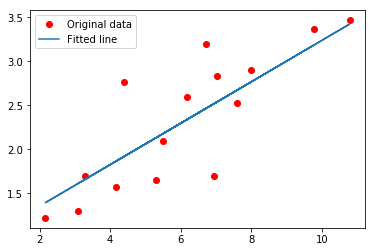

In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 设置超参数
input_size = 1
output_size = 1
num_epochs = 60  # 迭代次数
learning_rate = 1e-3

# 模拟一个训练集
x_train = np.array(
    [[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59],
     [2.167], [7.042], [10.791], [5.313], [7.997], [3.1]],
    dtype=np.float32)

y_train = np.array(
    [[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53],
     [1.221], [2.827], [3.465], [1.65], [2.904], [1.3]],
    dtype=np.float32)

# 线性回归模型
model = nn.Linear(input_size, output_size)

# 损失函数与优化器
criterion = nn.MSELoss()  # 均方误差
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 训练模型
for epoch in range(num_epochs):
    # numpy 数组转换为 torch Tensor
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # 前向传播
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # 反向传播与优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs,
                                                   loss.item()))

# 作图
predicted = model(torch.from_numpy(x_train)).detach().numpy()
# model(torch.from_numpy(x_train)) 是预测数据
# detach 将 Tensor 从创建它的计算图中分离出来，使其成为一片叶子
plt.plot(x_train, y_train, 'ro', label='Original data') # ro 红点
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# 保存模型检查点
torch.save(model.state_dict(), 'model.ckpt')